In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

## Question - 1 

In [ ]:
# 1) Delivery_time -> Predict delivery time using sorting time 
# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [ ]:
st1 = pd.read_csv('delivery_time.csv')
st1.head()

### EDA and Data Visualization

In [ ]:
st1.info()

In [ ]:
sns.distplot(st1['Delivery Time'])

In [ ]:
sns.distplot(st1['Sorting Time'])

### Feature Engineering

In [ ]:
# Renaming Columns
st1.rename({'Delivery Time':'DT','Sorting Time':'ST'}, axis=1, inplace = True)
st1.head()

### Correlation Analysis

In [ ]:
st1.corr()

In [ ]:
sns.regplot(x=st1['DT'],y=st1['ST'])

### Model Building

In [ ]:
model=smf.ols("DT~ST",data=st1).fit()

### Model Testing

In [ ]:
# Finding Coefficient parameters
model.params

In [ ]:
model.summary()

In [ ]:
# Finding tvalues and pvalues
model.tvalues, model.pvalues

In [ ]:
# Finding Rsquared Values
model.rsquared, model.rsquared_adj

### Model Predictions

In [ ]:
# Manual prediction for say sorting time 6
DT = (6.582734) + (1.649020)*(6)
DT

In [ ]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([6,9])
new_data

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['ST'])
data_pred

In [ ]:
model.predict(data_pred)

## Question - 2

In [9]:
# Salary_hike -> Build a prediction model for Salary_hike
# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [10]:
hike = pd.read_csv('Salary_Data.csv')
hike.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### EDA and Data Visualization

In [11]:
hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


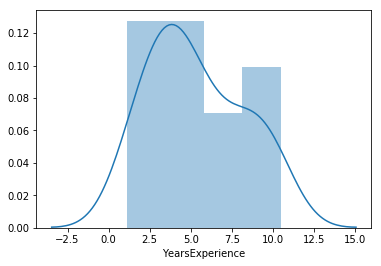

In [12]:
sns.distplot(hike['YearsExperience'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


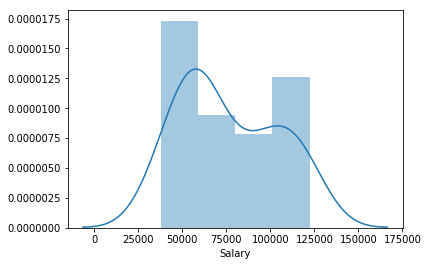

In [13]:
sns.distplot(hike['Salary'])

### Correlation Analysis

In [14]:
hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


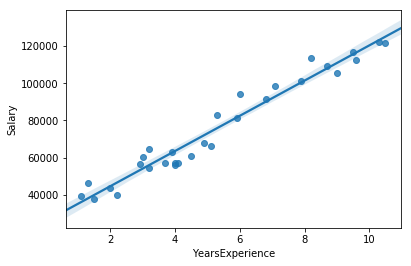

In [15]:
sns.regplot(x=hike['YearsExperience'],y=hike['Salary'])

### Model Building

In [16]:
hike1 = smf.ols('Salary~YearsExperience',data=hike)

In [17]:
hike2=hike1.fit()

### Model Testing

In [18]:
hike2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        16:54:33   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
hike2.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

### Model Predictions

In [20]:
# Manual prediction for say 2.5 years
salary_hike = (25792.2) + (9449.96)*(2.5)
salary_hike

49417.1

In [21]:
# Automatic Prediction for say 2.5,7,10 Years Experience
salary4=pd.Series([3,5])
salary4

0    3
1    5
dtype: int64

In [22]:
experience=pd.DataFrame(salary4,columns=['YearsExperience'])
experience

,YearsExperience
0,3
1,5


In [25]:
hike2.predict(experience)

0    54142.087163
1    73042.011806
dtype: float64